In [1]:
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [2]:
print("Initial Shape & Dimension of x_train:",str(x_train.shape))
print("Number of samples in our training data:",str(len(x_train)))
print("Number of labels in our data:",str(len(x_test)))

Initial Shape & Dimension of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our data: 10000


In [3]:
import numpy as np
import cv2
for i in range(0,6):
    random_num=np.random.randint(0,len(x_train))
    img=x_train[random_num]
    window_name="Random Sample"+str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

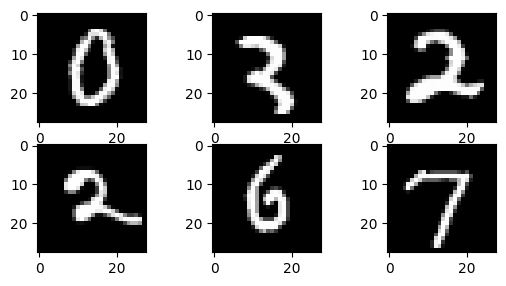

In [4]:
# checking with matplotlib
import matplotlib.pyplot as plt
plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.subplot(337)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.subplot(338)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.subplot(339)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))
plt.show()

In [5]:
# reshaping the data
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [6]:
# Normalization
x_train /=255
x_test /=255
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Number of classes:",str(y_test.shape[1]))
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]
y_train[0]

Number of classes: 10


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Building and Compiling the Model

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# designing model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes,activation="softmax"))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compiling
model.compile(loss ="categorical_crossentropy", optimizer= keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), metrics = ['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,186,990 (4.53 MB)

 Trainable params: 1,186,990 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
# Training the model
batch_size =32
epochs=6
history= model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test Accuracy:",score[1])

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8721 - loss: 0.4025 - val_accuracy: 0.9801 - val_loss: 0.0603
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9734 - loss: 0.0907 - val_accuracy: 0.9873 - val_loss: 0.0366
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9798 - loss: 0.0662 - val_accuracy: 0.9887 - val_loss: 0.0323
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9836 - loss: 0.0516 - val_accuracy: 0.9906 - val_loss: 0.0284
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9902 - val_loss: 0.0304
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9879 - loss: 0.0362 - val_accuracy: 0.9911 - val_loss: 0.0314
Test loss: 0.03138919919729233
Test Accuracy: 0.991100013256073


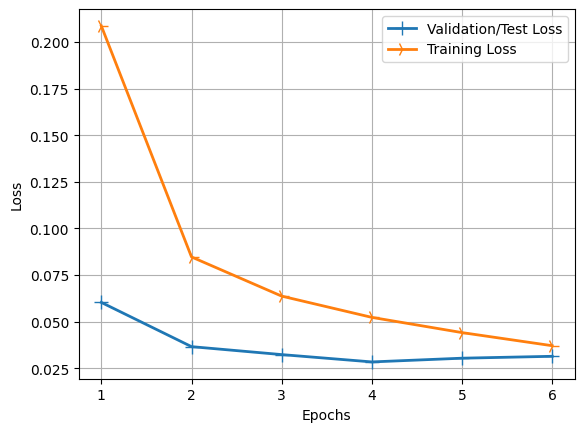

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

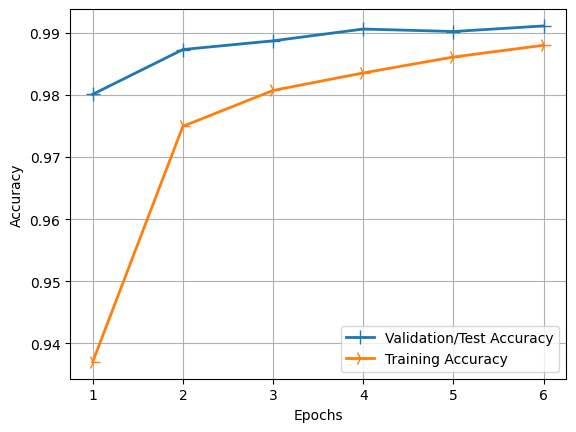

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# saving model
#model.save("./model.h5")
# using model

#from keras.models import load_model
#model=load_model("./model.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


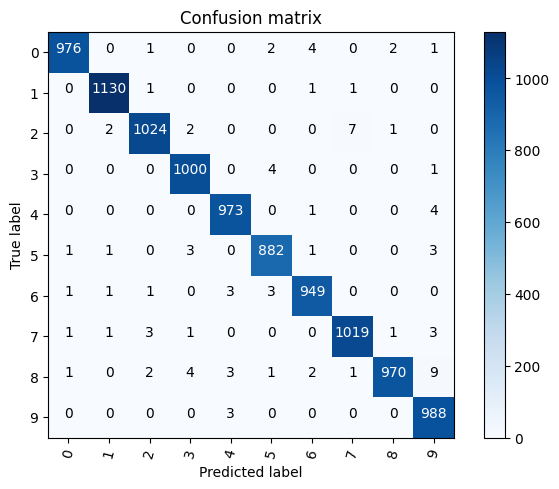

In [15]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(10)
cm = confusion_matrix(y_pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [18]:

from sklearn.metrics import classification_report
import numpy as np


predictions_prob = model.predict(x_test)

predictions = np.argmax(predictions_prob, axis=1)  


print(classification_report(y_test, predictions))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

